In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from pandas.tseries.offsets import CustomBusinessDay

The magic formula ranks companies based on two factors: return on capital and earnings yield.

#### Return on Capital
$\textrm{ROC} = \textrm{EBIT}/\textrm{(Net Working Capital + Net Fixed Assets)}$

$\begin{split}
\textrm{Net Fixed Assets} & = \textrm{Total Assets} \\
 & - \textrm{Total Current Assets} \\
 & - \textrm{Total Intangibles & Goodwill}
\end{split}$

#### Earnings yield
$\textrm{Earnings Yield} = \textrm{EBIT} / \textrm{Enterprise Value}$

$\begin{split}
\textrm{Enterprise Value} & = \textrm{Market Value of Equity} \\
 & + \textrm{Net Interest-Bearing Debt}
\end{split}$

In [58]:
def org_columns(df):
    '''
    Organiza os dataframes, arruma nomes das colunas, remove linhas
    e colunas que possuam apenas NAs
    '''
    tickers = df.columns.str.extract('(.*)$')[0]
    df.columns = tickers
    df[df.index.str.contains("Jan|Feb|Apr|May|Jul|Aug|Oct|Nov")]=np.NaN
    df = df.fillna(method='ffill', limit=2)
    df.columns.name = "ticker"
    return df

In [132]:
# Volume Mensal (in thousands) - vm
vm_ati = pd.read_excel('../../data/economatica_1/volume_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
vm_can = pd.read_excel('../../data/economatica_1/volume_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
vm_ati.drop(["Jan-86", "Feb-86"], inplace=True)
vm_can.drop(["Jan-86", "Feb-86"], inplace=True)
vm = pd.concat([vm_ati,vm_can],axis=1,sort=False)
vm.columns = vm.columns.str.extract('(.*)$')[0]
vm.columns.name = "ticker"
vm.drop(["Oct-19"], inplace=True)

In [60]:
# EBIT
ebit_ati = pd.read_excel('../../data/economatica_1/ebit_mensal__ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ebit_can = pd.read_excel('../../data/economatica_1/ebit_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ebit_can.drop(["Jan-86", "Feb-86"], inplace=True)
ebit = pd.concat([ebit_ati,ebit_can],axis=1,sort=False)
ebit = org_columns(ebit)

In [61]:
# Net Working Capital - nwc
nwc_ati = pd.read_excel('../../data/economatica_1/working_capital_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nwc_can = pd.read_excel('../../data/economatica_1/working_capital_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nwc_can.drop(["Jan-86", "Feb-86"], inplace=True)
nwc = pd.concat([ebit_ati,ebit_can],axis=1,sort=False)
nwc = org_columns(nwc)

In [62]:
# Total Assets - ta
ta_ati = pd.read_excel('../../data/economatica_1/total_assets_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ta_can = pd.read_excel('../../data/economatica_1/total_assets_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ta_can.drop(["Jan-86", "Feb-86"], inplace=True)
ta = pd.concat([ta_ati,ta_can],axis=1,sort=False)
ta = org_columns(ta)

In [72]:
# Ativo Circulante - ac
ac_ati = pd.read_excel('../../data/economatica_1/ativo_circulante_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ac_can = pd.read_excel('../../data/economatica_1/ativo_circulante_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
ac_can.drop(["Jan-86", "Feb-86"], inplace=True)
ac = pd.concat([ac_ati,ac_can],axis=1,sort=False)
ac = org_columns(ac)

In [74]:
# Passivo Circulante - pc
pc_ati = pd.read_excel('../../data/economatica_1/passivo_circulante_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
pc_can = pd.read_excel('../../data/economatica_1/passivo_circulante_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
pc_can.drop(["Jan-86", "Feb-86"], inplace=True)
pc = pd.concat([pc_ati,pc_can],axis=1,sort=False)
pc = org_columns(pc)

In [76]:
# Total Current Assets
# tca = ac - pc
tca = ac.sub(pc,fill_value=0)

In [82]:
# Goodwill - gw
gw_ati = pd.read_excel('../../data/economatica_1/goodwill_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
gw_can = pd.read_excel('../../data/economatica_1/goodwill_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
gw_ati.drop(["Jan-86", "Feb-86"], inplace=True)
gw = pd.concat([gw_ati,gw_can],axis=1,sort=False)
gw = org_columns(gw)

In [86]:
# Net Fixed Assets - nfa
# nfa = ta - tca - gw
nfa = ta.sub(tca, fill_value=0).sub(gw, fill_value=0).sub(tca, fill_value=0)

In [117]:
# Market Value of Equity - mve
# mve tem 404 rows enquanto normalmente as outras tem 4003, o que causa problema na hora de somar, para ver qual a diferença
# mve.index.difference(nibd.index)
# mve tem outubro de 2019 a mais
mve_ati = pd.read_excel('../../data/economatica_1/valor_mercado_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
mve_can = pd.read_excel('../../data/economatica_1/valor_mercado_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
mve_can.drop(["Jan-86", "Feb-86"], inplace=True)
mve = pd.concat([mve_ati,mve_can],axis=1,sort=False)
mve.drop(["Oct-19"], inplace=True)
mve = org_columns(mve)

In [118]:
# Net Interest-Bearing Debt - nibd
nibd_ati = pd.read_excel('../../data/economatica_1/net_debt_mensal_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nibd_can = pd.read_excel('../../data/economatica_1/net_debt_mensal_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
nibd_can.drop(["Jan-86", "Feb-86"], inplace=True)

nibd = pd.concat([nibd_ati,nibd_can],axis=1,sort=False)
nibd = org_columns(nibd)

In [119]:
# Enterprise Level - ev
# ev = mve + nibd
ev = mve.add(nibd, fill_value=0)

In [121]:
# Return on Capital (ROC)
# roc = ebit / (nwc + nfa)
roc = ebit.div(nwc.add(nfa,fill_value=0),fill_value=0)

In [123]:
# Earnings Yield
ey = ebit.div(ev, fill_value=0)

In [18]:
# PARTE 2
# Abrir preços diário e transformar em fim de mes

In [125]:
def infer_calendar(dates):
    """
    Infer a calendar as pandas DateOffset from a list of dates.
    Parameters
    ----------
    dates : array-like (1-dimensional) or pd.DatetimeIndex
        The dates you want to build a calendar from
    Returns
    -------
    calendar : pd.DateOffset (CustomBusinessDay)
    """
    dates = pd.DatetimeIndex(dates)

    traded_weekdays = []
    holidays = []

    days_of_the_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for day, day_str in enumerate(days_of_the_week):

        weekday_mask = (dates.dayofweek == day)

        # keep only days of the week that are present
        if not weekday_mask.any():
            continue
        traded_weekdays.append(day_str)

        # look for holidays
        used_weekdays = dates[weekday_mask].normalize()
        all_weekdays = pd.date_range(dates.min(), dates.max(),
                                     freq=CustomBusinessDay(weekmask=day_str)
                                     ).normalize()
        _holidays = all_weekdays.difference(used_weekdays)
        _holidays = [timestamp.date() for timestamp in _holidays]
        holidays.extend(_holidays)

    traded_weekdays = ' '.join(traded_weekdays)
    return CustomBusinessDay(weekmask=traded_weekdays, holidays=holidays)

In [126]:
# Carrega Closing Price Diário - cpd
cpd_ati = pd.read_excel('../../data/economatica_1/fechamento_diario_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
cpd_can = pd.read_excel('../../data/economatica_1/fechamento_diario_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
cpd = pd.concat([cpd_ati,cpd_can],axis=1,sort=False)
cpd.columns = cpd.columns.str.extract('(.*)$')[0]
cpd.columns.name = "ticker"
cpd.dropna(how='all',inplace=True) # cpd possui muitas linhas com NaN
cpd.dropna(axis=1, how='all',inplace=True) # cpd possui muitas colunas com NaN

In [127]:
# Calcula Closing Price Mensal - cpm e em percentual cpm_pct
dates = cpd.index
calendar = infer_calendar(dates)
cme_cal = pd.offsets.CustomBusinessMonthEnd(calendar = calendar.calendar)
idm = pd.date_range(dates[0], dates[-1], freq=cme_cal)
cpm = cpd.loc[idm]
cpm.drop([cpm.index[0],cpm.index[1]], inplace=True)
# cpm.drop[0] # não tem como dar drop estilo iloc
cpm_pct = cpm.pct_change()

In [20]:
# Agora já temos todas variáveis de interesse:
# 1) ROC - roc
# 2) EY - ey
# 3) Volume Mensal - vm
# 4) Preço Fechamento Mensal - cpm

In [21]:
# Sobre o processo
# - Elimina financeiras
# Todo fim de mês:
# 	- Elimina ações com volume mensal menor que 2 milhões
# 	- Calcula ROIC e EY
# 	- Rankeia, exclui negativos e soma os ranks de acordo com Magic Formula
# 	- Escolhe 5 ações com melhor rankeamento

In [257]:
l = len(cpm)
# start money
sm = 1
portfolio = pd.Series([])
pf_idx = pd.Index([])
rets = pd.Series(np.zeros(l), index=cpm.index)
for i in range(100,l):
    print(i)
    if len(pf_idx)==5:
        print("ok")
        portfolio = cpm_pct.iloc[i][pf_idx]
        rets[i] = portfolio.sum()/5
        print(portfolio)
    vm_2000 = vm.iloc[i]
    vm_2000 = vm_2000[vm_2000>2000]
    idx = vm_2000.index
    #print(len(idx))
    roc_2000 = roc.iloc[i][idx]
    ey_2000 = ey.iloc[i][idx]
    roc_rank = roc_2000.sort_values(ascending=False).rank(ascending=False)
    ey_rank = ey_2000.sort_values(ascending=False).rank(ascending=False)
    winners = (ey_rank + roc_rank).sort_values(ascending=True)
    pf_idx = winners.head(5).index
    #print(pf_idx)

100
101
ok
ticker
ALPA3    0.149425
ALPA4    0.187821
CNFB4    0.451028
WHMT3    0.146953
LAME4   -0.048000
Name: 1994-08-31 00:00:00, dtype: float64
102
ok
ticker
ALPA3   -0.166667
ALPA4   -0.002471
CNFB4    0.266667
WHMT3    0.166667
NAKT4    0.077586
Name: 1994-09-30 00:00:00, dtype: float64
103
ok
ticker
ALPA4    0.238390
CNFB4   -0.013158
FRI4     0.040956
MYPK4    0.017391
LAME4    0.181818
Name: 1994-10-31 00:00:00, dtype: float64
104
ok
ticker
ALPA4   -0.125000
CNFB4    0.166667
FRI4     0.049180
MYPK4    0.051282
LAME4    0.153846
Name: 1994-11-30 00:00:00, dtype: float64
105
ok
ticker
ALPA4   -0.085714
CNFB4    0.000000
FRI4     0.010417
MYPK4   -0.040650
RIO4    -0.274725
Name: 1994-12-29 00:00:00, dtype: float64
106
ok
ticker
INEP4   -0.015385
ALPA4   -0.125000
BOBR4   -0.106383
CTNM4   -0.319426
RAPT4   -0.204545
Name: 1995-01-31 00:00:00, dtype: float64
107
ok
ticker
INEP4    0.250000
ALPA4    0.013020
BOBR4   -0.023809
CTNM4   -0.097959
RAPT4   -0.064286
Name: 1995-02-24

167
ok
ticker
FESA4          0.112817
ETER3          0.039474
SUZB5+SUZB3   -0.151515
EMBR3          0.017454
GOAU4         -0.034483
Name: 2000-02-29 00:00:00, dtype: float64
168
ok
ticker
FESA4          0.017241
ALPA4          0.099526
SUZB5+SUZB3   -0.083333
EMBR3          0.087956
GOAU4         -0.047619
Name: 2000-03-31 00:00:00, dtype: float64
169
ok
ticker
EMBR3    0.061453
POMO4    0.106383
PETR4   -0.088771
PETR3   -0.090909
ABEV3    0.052049
Name: 2000-04-28 00:00:00, dtype: float64
170
ok
ticker
EMBR3   -0.137895
POMO4    0.088462
PETR4   -0.025808
PETR3    0.012500
ABEV3    0.000000
Name: 2000-05-31 00:00:00, dtype: float64
171
ok
ticker
EMBR3    0.347361
PETR4    0.300716
PETR3    0.308148
ALPA3    0.000000
ABEV3    0.225789
Name: 2000-06-30 00:00:00, dtype: float64
172
ok
ticker
PTIP4    0.061825
PETR4   -0.140917
PETR3   -0.124198
RAPT4   -0.081967
POMO4   -0.056537
Name: 2000-07-31 00:00:00, dtype: float64
173
ok
ticker
ALPA3    0.016084
ALPA4    0.104927
PETR3    0.242

245
ok
ticker
GOAU3   -0.055472
GOAU4   -0.048953
RAPT4    0.002941
CTNM4    0.023641
ITSA3   -0.009059
Name: 2006-08-31 00:00:00, dtype: float64
246
ok
ticker
GOAU4   -0.049211
GOAU3   -0.002849
RAPT4    0.061584
CTNM4   -0.059181
ITSA3   -0.029304
Name: 2006-09-29 00:00:00, dtype: float64
247
ok
ticker
GOAU3    0.051429
GOAU4    0.071132
RAPT4    0.029006
ITSA4    0.086034
ITSA3    0.000000
Name: 2006-10-31 00:00:00, dtype: float64
248
ok
ticker
GOAU3    0.076560
GOAU4    0.091825
RAPT4    0.200000
ITSA4    0.033951
ITSA3    0.000000
Name: 2006-11-30 00:00:00, dtype: float64
249
ok
ticker
GOAU4    0.055222
GOAU3    0.051282
RAPT3    0.042287
RAPT4    0.085547
ITSA3    0.000000
Name: 2006-12-28 00:00:00, dtype: float64
250
ok
ticker
GOAU3    0.048780
GOAU4    0.003868
RAPT3    0.000000
RAPT4    0.078125
GGBR3   -0.027287
Name: 2007-01-31 00:00:00, dtype: float64
251
ok
ticker
GOAU4    0.067573
GOAU3    0.055049
RAPT4    0.111111
GGBR3    0.015962
GGBR4    0.020440
Name: 2007-02-28 00:

310
ok
ticker
RAPT4    0.092723
PFRM3    0.106977
FESA4    0.062119
EZTC3    0.123496
CSNA3    0.218291
Name: 2012-01-31 00:00:00, dtype: float64
311
ok
ticker
RAPT4    0.167562
PFRM3    0.008403
FESA4    0.152523
EZTC3    0.126832
CSNA3   -0.040548
Name: 2012-02-29 00:00:00, dtype: float64
312
ok
ticker
RAPT4    0.096567
PFRM3   -0.190833
FESA4    0.124378
CSNA3   -0.016562
EZTC3    0.125563
Name: 2012-03-30 00:00:00, dtype: float64
313
ok
ticker
CSAN3   -0.025324
SLED4   -0.003036
CRPG5    0.023891
PFRM3   -0.003326
ETER3    0.080087
Name: 2012-04-30 00:00:00, dtype: float64
314
ok
ticker
CSAN3   -0.094864
SLED4   -0.008264
CRPG5    0.166667
CRPG6    0.058824
PFRM3    0.049318
Name: 2012-05-31 00:00:00, dtype: float64
315
ok
ticker
CSAN3    0.034379
SLED4   -0.026316
CRPG5   -0.095238
ETER3    0.104523
PFRM3    0.010000
Name: 2012-06-29 00:00:00, dtype: float64
316
ok
ticker
PFRM3    0.079208
CRPG5    0.315789
RDNI3   -0.121929
SCAR3    0.008309
ETER3   -0.012739
Name: 2012-07-31 00:

383
ok
ticker
ENAT3   -0.069652
FESA4    0.002554
TEND3    0.016555
TRIS3   -0.012844
BRAP4    0.092042
Name: 2018-02-28 00:00:00, dtype: float64
384
ok
ticker
ENAT3    0.216043
FESA4   -0.099363
TEND3    0.159771
TRIS3    0.109665
IDNT3   -0.036548
Name: 2018-03-29 00:00:00, dtype: float64
385
ok
ticker
ENAT3    0.289128
JBDU4   -0.093023
AGRO3    0.024615
FESA4   -0.018859
FRAS3   -0.024867
Name: 2018-04-30 00:00:00, dtype: float64
386
ok
ticker
ENAT3   -0.045419
AGRO3    0.012012
FESA4   -0.086977
SMTO3    0.031802
FRAS3   -0.036430
Name: 2018-05-30 00:00:00, dtype: float64
387
ok
ticker
ENAT3    0.214110
AGRO3    0.005193
FESA4   -0.027194
SMTO3    0.018836
FRAS3   -0.089724
Name: 2018-06-29 00:00:00, dtype: float64
388
ok
ticker
PRIO3    0.145857
AGRO3    0.034686
ENAT3    0.093243
UNIP6    0.123529
UNIP5    0.109626
Name: 2018-07-31 00:00:00, dtype: float64
389
ok
ticker
PRIO3    0.178531
AGRO3    0.030670
ENAT3   -0.245983
UNIP6    0.092647
UNIP3    0.050453
Name: 2018-08-31 00:

In [256]:
rets[100:200]

1994-07-29    0.074887
1994-08-31    0.177446
1994-09-30    0.068356
1994-10-31    0.093079
1994-11-30    0.059195
1994-12-29   -0.078135
1995-01-31   -0.154148
1995-02-24    0.015393
1995-03-31    0.004637
1995-04-28    0.113009
1995-05-31   -0.034911
1995-06-30    0.017258
1995-07-31   -0.061192
1995-08-31    0.054278
1995-09-29    0.043481
1995-10-31   -0.071254
1995-11-30   -0.047058
1995-12-28   -0.105458
1996-01-31    0.251563
1996-02-29   -0.029011
1996-03-29   -0.038807
1996-04-30    0.083099
1996-05-31    0.083572
1996-06-28    0.131455
1996-07-31   -0.054592
1996-08-30    0.014453
1996-09-30   -0.005467
1996-10-31    0.026127
1996-11-29   -0.001261
1996-12-30    0.056171
                ...   
2000-05-31   -0.012548
2000-06-30    0.236403
2000-07-31   -0.068359
2000-08-31    0.113595
2000-09-29   -0.039170
2000-10-31   -0.039789
2000-11-30   -0.049259
2000-12-28    0.057531
2001-01-31    0.146213
2001-02-28   -0.004665
2001-03-30   -0.023353
2001-04-30    0.062872
2001-05-31 

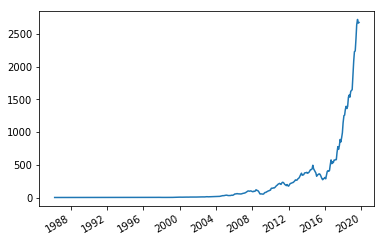

In [258]:
final = 1*(1+rets).cumprod()
final.plot()
plt.show()

In [222]:
pf_idx = pd.Index([])
pf_idx

Index([], dtype='object')

In [205]:
print(portfolio)
print(portfolio_new)

ticker
ALPA4     0.165146
CNFB4     0.130127
FRI4      0.807391
MYPK4    22.285380
RIO4      0.025823
Name: 1994-11-30 00:00:00, dtype: float64
ticker
ALPA4     0.165146
CNFB4     0.130127
FRI4      0.807391
MYPK4    22.285380
LAME4     0.186735
Name: 1994-11-30 00:00:00, dtype: float64


In [200]:
# cpm.iloc[i][portfolio]
# len(portfolio)==5
# engraçado como ~portfolio.empty não funciona...
# ~(portfolio.empty)
portfolio = cpm.iloc[i][pf_idx]
portfolio

ticker
ALPA4     0.165146
CNFB4     0.130127
FRI4      0.807391
MYPK4    22.285380
RIO4      0.025823
Name: 1994-11-30 00:00:00, dtype: float64

In [179]:
portfolio = pd.Series([])
portfolio

Series([], dtype: float64)

In [161]:
winners = (ey_rank + roc_rank).sort_values(ascending=True)
winners.head(5).index

Index(['PETR3', 'PETR4', 'USIM5', 'CSNA3', 'ITSA4'], dtype='object', name='ticker')

In [272]:
l = len(cpm)
# start money
sm = 100
for i in range(100,120):
    vm_2000 = vm.iloc[i]
    vm_2000 = vm_2000[vm_2000>2000]
    idx = vm_2000.index
    if len(idx) < 50:
        continue
    roc_rank = roc.iloc[i][idx].sort_values(ascending=False).rank(ascending=False)
    ey_rank = ey.iloc[i][idx].sort_values(ascending=False).rank(ascending=False)

    print(ey_rank)
    # winners = x.sort_values(ascending=False)

ticker
CLSC4         1.0
BOBR4         2.0
VALE3         3.0
RAPT4         4.0
LIGT3         5.0
BDLL4         6.0
CPLE3         7.0
ELET6         8.5
ELET3         8.5
OIBR4        10.0
BMTO3        11.5
BMTO4        11.5
CMIG4        13.5
CMIG3        13.5
VIVT4        15.5
VIVT3        15.5
ITSA4        17.0
PETR4        18.0
KLBN4        19.0
ALPA4        20.5
ALPA3        20.5
CTNM4        22.0
CSNA3        23.0
BRKM5        24.0
CESP5        25.0
LAME4        26.0
USIM5        27.0
AMBV4        28.0
VALE5        29.0
PALF3        30.0
             ... 
ACES3         NaN
ACES4         NaN
ANTA3         NaN
ARCZ6         NaN
ARCE3         NaN
ARNO4         NaN
BESP4         NaN
LITS3         NaN
CEVA4         NaN
MSAN4         NaN
MAHS4         NaN
CABR4         NaN
ICPI4         NaN
CTLU4         NaN
DURA4         NaN
REPA4         NaN
ERIC4         NaN
DPPI4         NaN
PTIP4         NaN
RIPI4         NaN
BNAC4         NaN
BRDT4-old     NaN
REAL3         NaN
VSMA3         NaN
SDI

ticker
CESP3           1.5
CESP5           1.5
CMIG4           3.0
WHRL4           4.0
VALE3           5.0
LIGT3           6.0
BMTO4           7.0
OIBR4           8.0
PETR4           9.0
RAPT4          10.0
ITSA4          11.0
VIVT3          12.5
VIVT4          12.5
ALPA4          14.0
BRKM5          15.0
KLBN4          16.0
GOAU4          17.0
LAME4          18.0
CTNM4          19.0
CSNA3          20.0
SUZB5+SUZB3    21.0
BDLL4          22.0
INEP4          23.0
USIM5          24.0
WEGE4          25.0
PMAM4          26.0
VALE5          27.0
PALF3          28.0
PRGA4          29.0
MYPK4          30.0
               ... 
CABR4           NaN
CHAP4           NaN
ICPI4           NaN
FAPC4           NaN
CPSL3           NaN
DURA4           NaN
REPA4           NaN
EBCO4           NaN
FRI4            NaN
DPPI4           NaN
PTIP4           NaN
MANM3           NaN
BNAC4           NaN
CARB5           NaN
BRDT4-old       NaN
RHER4           NaN
VSMA3           NaN
SDIA4           NaN
SAMI4        

Name: Dec-15, Length: 98, dtype: float64


In [277]:
i = 133
roc_rank = roc.iloc[i][idx].sort_values(ascending=False).rank(ascending=False)
ey_rank = ey.iloc[i][idx].sort_values(ascending=False).rank(ascending=False)
score=roc_rank+ey_rank
score.sort_values().head(5).index


Index(['WHRL4', 'WHRL3', 'CAMB4', 'ITSA4', 'GOAU4'], dtype='object', name='ticker')

In [263]:
i = 100
vm_2000 = vm.iloc[i]
vm_2000 = vm_2000[vm_2000>2000]
idx = vm_2000.index
len(idx)

74

In [268]:
roc.iloc[i][idx]

ticker
BRIV3        0.000000
ALPA3        0.058429
ALPA4        0.058429
BDLL4        0.018144
BOBR4        0.047468
BBDC4        0.000000
BBAS3        0.000000
BRKM5        0.014840
CLSC4        0.031038
CMIG3        0.030712
CMIG4        0.030712
CESP5        0.011447
CPLE3        0.027499
CTNM4        0.009956
ELET3        0.015708
ELET6        0.015708
ITSA4       -0.010363
ITUB4        0.000000
KLBN4        0.020160
LIGT3        0.035433
LAME4        0.033620
OIBR4        0.016009
PETR4        0.025712
RAPT4        0.047414
CSNA3        0.040257
VIVT3        0.028202
VIVT4        0.028202
UNIP6             NaN
USIM5        0.008078
VALE3        0.067437
               ...   
CEVA4             NaN
MSAN4             NaN
MAHS4             NaN
CABR4             NaN
ICPI4             NaN
CNFB4        0.068765
CTLU4             NaN
DURA4             NaN
REPA4             NaN
ERIC4             NaN
VCPA4        0.006362
MYPK4        0.048078
DPPI4             NaN
PTIP4             NaN
RIP

In [224]:
i = 133
    roc_rank = roc.iloc[i].sort_values(ascending=False).rank(ascending=False)

roc_rank

ticker
CEAB3      1.0
OPGM3B     2.0
GRUC6      4.0
GRUC3      4.0
CAIA3B     4.0
SQRM4      7.0
SQRM3      7.0
SQRM11     7.0
CABI3B     9.5
CACO3B     9.5
STBR11    12.0
STBR3     12.0
STBR4     12.0
QVQP3B    14.0
CMSA4     15.5
CMSA3     15.5
ALTR3     17.0
PRPT3B    18.0
ALEF3B    19.0
OPSE3B    20.0
BETP3B    21.0
ATOM3     22.0
CRTE3B    23.5
CRTE5B    23.5
SMLS3     25.0
BBSE3     26.0
WIZS3     27.0
AGRO3     28.0
VIVA3     29.0
ODPV3     30.0
          ... 
VEMG4      NaN
VGOR3      NaN
VGOR4      NaN
VIGR3      NaN
VINE3      NaN
VINE5      NaN
VINE6      NaN
VIVO3      NaN
VIVO4      NaN
VLTR3B     NaN
VLTR5B     NaN
VLTR6B     NaN
VPSC3      NaN
VPSC4      NaN
VPTA3      NaN
VPTA4      NaN
VRLM4      NaN
VSMA3      NaN
VTEC4      NaN
VVAX11     NaN
VVAX3      NaN
VVAX4      NaN
WET4       NaN
WHMT3      NaN
WISA3      NaN
WISA4      NaN
WMBY3      NaN
WMBY4      NaN
WWOW3      NaN
ZIVI4      NaN
Name: Jun-19, Length: 1296, dtype: float64

In [228]:
ey_rank = ey.iloc[i].sort_values(ascending=False).rank(ascending=False)
ey_rank

ticker
FIGE4       1.5
FIGE3       1.5
CALI3       3.5
CALI4       3.5
GPIV33      5.0
LTEL11B     7.0
LTEL5B      7.0
LTEL3B      7.0
OPSE3B      9.0
PRPT3B     10.0
QVQP3B     11.0
CACO3B     12.0
CMSA4      13.5
CMSA3      13.5
ALEF3B     15.0
CABI3B     16.0
MNPR3      17.0
STTR3      18.0
CEGR3      19.0
CORR3      20.5
CORR4      20.5
CEAB3      22.0
OPTS3B     23.0
STKF3      24.0
VIVA3      25.0
RSUL4      26.5
RSUL3      26.5
GPAR3      28.0
INNT3      29.0
ODER4      30.5
           ... 
VEMG4       NaN
VGOR3       NaN
VGOR4       NaN
VIGR3       NaN
VINE3       NaN
VINE5       NaN
VINE6       NaN
VIVO3       NaN
VIVO4       NaN
VLTR3B      NaN
VLTR5B      NaN
VLTR6B      NaN
VPSC3       NaN
VPSC4       NaN
VPTA3       NaN
VPTA4       NaN
VRLM4       NaN
VSMA3       NaN
VTEC4       NaN
VVAX11      NaN
VVAX3       NaN
VVAX4       NaN
WET4        NaN
WHMT3       NaN
WISA3       NaN
WISA4       NaN
WMBY3       NaN
WMBY4       NaN
WWOW3       NaN
ZIVI4       NaN
Name: Jun-19, Len

In [231]:
score=roc_rank+ey_rank
score.sort_values()

ticker
CACO3B     21.5
CEAB3      23.0
QVQP3B     25.0
CABI3B     25.5
PRPT3B     28.0
CMSA3      29.0
CMSA4      29.0
OPSE3B     29.0
ALEF3B     34.0
STTR3      49.0
VIVA3      54.0
AGRO3      63.0
GPIV33     67.0
BETP3B     72.0
OPGM3B     79.0
INNT3      82.0
WIZS3      95.0
PTNT4      97.0
PTNT3      97.0
CEGR3     101.0
ATOM3     109.0
SLCE3     110.0
ALUP4     113.0
ALUP11    113.0
ALUP3     113.0
SMLS3     126.0
BTTL3     128.5
CGAS5     143.0
CGAS3     143.0
ELEK3     164.0
          ...  
VEMG4       NaN
VGOR3       NaN
VGOR4       NaN
VIGR3       NaN
VINE3       NaN
VINE5       NaN
VINE6       NaN
VIVO3       NaN
VIVO4       NaN
VLTR3B      NaN
VLTR5B      NaN
VLTR6B      NaN
VPSC3       NaN
VPSC4       NaN
VPTA3       NaN
VPTA4       NaN
VRLM4       NaN
VSMA3       NaN
VTEC4       NaN
VVAX11      NaN
VVAX3       NaN
VVAX4       NaN
WET4        NaN
WHMT3       NaN
WISA3       NaN
WISA4       NaN
WMBY3       NaN
WMBY4       NaN
WWOW3       NaN
ZIVI4       NaN
Name: Jun-19, Len

In [134]:
cpm

ticker,ABCB4,EALT3,EALT4,ADHM3,TIET3,TIET4,TIET11,AFLT3,BRGE3,BRGE5,...,WMBY4,WET4,WHMT3,WISA3,WISA4,ILMD3,ILMD4,ESTC4,ESTC11,ZIVI4
1986-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.580065e-11,NaN,3.180032e-09,NaN,NaN,NaN,8.749650e-08,NaN,NaN,NaN
1986-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.580065e-11,NaN,4.240042e-09,NaN,NaN,NaN,2.770722e-07,NaN,NaN,NaN
1986-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.860965e-11,NaN,4.055026e-09,NaN,NaN,NaN,2.221638e-07,NaN,NaN,NaN
1986-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987370e-11,NaN,3.400022e-09,NaN,NaN,NaN,1.698899e-07,NaN,NaN,NaN
1986-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.176978e-11,NaN,3.700024e-09,NaN,NaN,NaN,1.568215e-07,NaN,NaN,NaN
1986-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.544952e-11,NaN,2.900019e-09,NaN,NaN,NaN,1.306846e-07,NaN,NaN,NaN
1986-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.497236e-12,NaN,2.147156e-09,NaN,NaN,NaN,9.213262e-08,NaN,NaN,NaN
1986-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.109557e-11,NaN,2.351648e-09,NaN,NaN,NaN,1.012805e-07,NaN,NaN,NaN
1986-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.129262e-12,NaN,1.891543e-09,NaN,NaN,NaN,7.906417e-08,NaN,NaN,NaN
1986-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.441057e-12,NaN,1.733062e-09,NaN,NaN,NaN,7.841075e-08,NaN,NaN,NaN


In [203]:
# cpm.drop(["1986-01-31"])
cpm.drop([cpm.index[0],cpm.index[1]])

ticker,ABCB4,EALT3,EALT4,ADHM3,TIET3,TIET4,TIET11,AFLT3,BRGE3,BRGE5,...,WMBY4,WET4,WHMT3,WISA3,WISA4,ILMD3,ILMD4,ESTC4,ESTC11,ZIVI4
1986-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.580065e-11,NaN,3.180032e-09,NaN,NaN,NaN,8.749650e-08,NaN,NaN,NaN
1986-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.580065e-11,NaN,4.240042e-09,NaN,NaN,NaN,2.770722e-07,NaN,NaN,NaN
1986-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.860965e-11,NaN,4.055026e-09,NaN,NaN,NaN,2.221638e-07,NaN,NaN,NaN
1986-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987370e-11,NaN,3.400022e-09,NaN,NaN,NaN,1.698899e-07,NaN,NaN,NaN
1986-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.176978e-11,NaN,3.700024e-09,NaN,NaN,NaN,1.568215e-07,NaN,NaN,NaN
1986-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.544952e-11,NaN,2.900019e-09,NaN,NaN,NaN,1.306846e-07,NaN,NaN,NaN
1986-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.497236e-12,NaN,2.147156e-09,NaN,NaN,NaN,9.213262e-08,NaN,NaN,NaN
1986-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.109557e-11,NaN,2.351648e-09,NaN,NaN,NaN,1.012805e-07,NaN,NaN,NaN
1986-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.129262e-12,NaN,1.891543e-09,NaN,NaN,NaN,7.906417e-08,NaN,NaN,NaN
1986-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.441057e-12,NaN,1.733062e-09,NaN,NaN,NaN,7.841075e-08,NaN,NaN,NaN


In [171]:
x = roc.iloc[10] # retorna Series com toda coluna 10
winners = x.sort_values(ascending=False)
# winners = winners[:5]
winners = winners.head(5)
# print de variables https://stackoverflow.com/questions/17153779/how-can-i-print-variable-and-string-on-same-line-in-python
print("i: {} ".format(14))
print(winners.index)

i: 14 
Index(['FBMC3', 'FBMC4', 'STRP4', 'STRP3', 'PMAM3'], dtype='object', name='ticker')


In [112]:
# número de columns: len(df.columns) ou df.shape[1]
# número de rows: len(df.index) ou len(df) ou df.shape[0]
l = len(roc) # esse len retorna número de rows de um dataframe
for i in range(1,l):
    winners = roc.iloc[i].sort_values(ascending=False).head(5)
    print("i: {} ".format(i),winners.index)

i: 1  Index(['SAGR4', 'PMET6', 'PMET5', 'PMET3', 'CBVI4'], dtype='object', name='ticker')
i: 2  Index(['PRGA4', 'BRFS3', 'PMAM4', 'PMAM3', 'AALR3'], dtype='object', name='ticker')
i: 3  Index(['CZAR4', 'SHAP4', 'WEGE4', 'WEGE3', 'IGBR7'], dtype='object', name='ticker')
i: 4  Index(['MADE4', 'PRGA4', 'BRFS3', 'ELUM4', 'ELUM3'], dtype='object', name='ticker')
i: 5  Index(['WHMT3', 'PMET6', 'PMET5', 'PMET3', 'EUCA3'], dtype='object', name='ticker')
i: 6  Index(['SIFC4', 'ELUM4', 'ELUM3', 'BRFS3', 'PRGA4'], dtype='object', name='ticker')
i: 7  Index(['ODBE4', 'FBMC3', 'FBMC4', 'IGBR7', 'IGBR6'], dtype='object', name='ticker')
i: 8  Index(['KEPL3', 'PMET6', 'PMET5', 'PMET3', 'SIFC4'], dtype='object', name='ticker')
i: 9  Index(['ITSA3', 'ITSA4', 'TUPY4', 'TUPY3', 'DURA4'], dtype='object', name='ticker')
i: 10  Index(['FBMC3', 'FBMC4', 'STRP4', 'STRP3', 'PMAM3'], dtype='object', name='ticker')
i: 11  Index(['VEMG4', 'SLED4', 'SLED3', 'CMMA4', 'CMMA3'], dtype='object', name='ticker')
i: 12  I

In [122]:
# Manipula ROC
# roc.iloc[135].sort_values(ascending=False).head(5)
idx = roc.iloc[133].sort_values(ascending=False).head(5).index
idx
roc.iloc[133].loc[idx]

ticker
CEAB3     369.358572
OPGM3B    112.000000
GRUC6       3.000000
GRUC3       3.000000
CAIA3B      3.000000
Name: Jun-19, dtype: float64

In [238]:
x = roc.iloc[133].sort_values(ascending=False).head(5)
x.rank(ascending=False)

ticker
SAGR4    1.0
PMET6    3.0
PMET5    3.0
PMET3    3.0
CBVI4    5.0
Name: Jun-86, dtype: float64

In [213]:
# Manipula EY
#idx = ey.iloc[300].sort_values(ascending=False)
ey.iloc[100].sort_values(ascending=False).head(5).index

Index(['CMSA4', 'CMSA3', 'CABI3B', 'CACO3B', 'MNZC3B'], dtype='object', name='ticker')

In [253]:
# Manipula Volume Mensal
# vm<100000 # não adianta muito pois aplica no dataframe todo. É muito melhor com uma Series.
vm_temp = vm.iloc[100]
print("Length de vm_temp inicial: {}".format(len(vm_temp)))
vm_notnull = vm_temp[vm_temp.notnull()]
print("Length de vm_temp not null: {}".format(len(vm_notnull)))
vm_300 = vm_temp[vm_temp>2000]
print("Length de vm_300 not null: {}".format(len(vm_300)))
#vm_temp[vm_temp>300000]


Length de vm_temp inicial: 1294
Length de vm_temp not null: 381
Length de vm_300 not null: 74


In [254]:
vm_temp

ticker
QVQP3B            NaN
ABCB4             NaN
EALT3             NaN
EALT4             NaN
ADHM3             NaN
TIET3             NaN
TIET4             NaN
TIET11            NaN
AFLT3             NaN
ALEF3B            NaN
BRGE3       50.253050
BRGE5             NaN
BRGE6             NaN
BRGE7             NaN
BRGE8        1.243570
BRGE11       4.430540
BRGE12      13.054180
CRIV3        1.214080
CRIV4        2.358000
RPAD3        9.214040
RPAD5        2.496000
RPAD6       30.513070
BRIV3     2687.111089
BRIV4       32.756070
ALSO3             NaN
APTI3             NaN
APTI4             NaN
FRRN3B            NaN
FRRN5B            NaN
FRRN6B            NaN
             ...     
NCNE5             NaN
VVAR4             NaN
VVAR11            NaN
VINE3             NaN
VINE5             NaN
VINE6             NaN
VGOR3             NaN
VGOR4      237.167592
VIGR3             NaN
VVAX3             NaN
VVAX4             NaN
VVAX11            NaN
VIVO3             NaN
VIVO4             NaN
VTE

In [186]:
l = len(roc) # esse len retorna número de rows de um dataframe
for i in range(1,l):
    winners = roc.iloc[i].sort_values(ascending=False).head(5)
    print("i: {} ".format(i),winners.index)

ticker
QVQP3B           NaN
ABCB4     198544.693
EALT3        102.154
EALT4       5039.488
ADHM3        976.159
TIET3      10510.644
TIET4      17465.153
TIET11    255742.536
AFLT3        213.299
ALEF3B           NaN
BRGE3          8.947
BRGE5            NaN
BRGE6          2.112
BRGE7            NaN
BRGE8          0.473
BRGE11        10.738
BRGE12         8.306
CRIV3       1384.804
CRIV4        312.829
RPAD3         40.203
RPAD5          9.617
RPAD6         35.337
BRIV3        169.807
BRIV4        615.610
ALSO3      96365.723
APTI3            NaN
APTI4            NaN
FRRN3B           NaN
FRRN5B           NaN
FRRN6B           NaN
             ...    
NCNE5            NaN
VVAR4            NaN
VVAR11           NaN
VINE3            NaN
VINE5            NaN
VINE6            NaN
VGOR3            NaN
VGOR4            NaN
VIGR3            NaN
VVAX3            NaN
VVAX4            NaN
VVAX11           NaN
VIVO3            NaN
VIVO4            NaN
VTEC4            NaN
VULC4            NaN
WEGE4 

In [206]:
# cpm.drop[0] # não tem como dar drop estilo iloc
cpm.drop([cpm.index[0],cpm.index[1]], inplace=True)
cpm

ticker,ABCB4,EALT3,EALT4,ADHM3,TIET3,TIET4,TIET11,AFLT3,BRGE3,BRGE5,...,WMBY4,WET4,WHMT3,WISA3,WISA4,ILMD3,ILMD4,ESTC4,ESTC11,ZIVI4
1986-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.580065e-11,NaN,3.180032e-09,NaN,NaN,NaN,8.749650e-08,NaN,NaN,NaN
1986-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.580065e-11,NaN,4.240042e-09,NaN,NaN,NaN,2.770722e-07,NaN,NaN,NaN
1986-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.860965e-11,NaN,4.055026e-09,NaN,NaN,NaN,2.221638e-07,NaN,NaN,NaN
1986-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987370e-11,NaN,3.400022e-09,NaN,NaN,NaN,1.698899e-07,NaN,NaN,NaN
1986-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.176978e-11,NaN,3.700024e-09,NaN,NaN,NaN,1.568215e-07,NaN,NaN,NaN
1986-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.544952e-11,NaN,2.900019e-09,NaN,NaN,NaN,1.306846e-07,NaN,NaN,NaN
1986-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.497236e-12,NaN,2.147156e-09,NaN,NaN,NaN,9.213262e-08,NaN,NaN,NaN
1986-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.109557e-11,NaN,2.351648e-09,NaN,NaN,NaN,1.012805e-07,NaN,NaN,NaN
1986-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.129262e-12,NaN,1.891543e-09,NaN,NaN,NaN,7.906417e-08,NaN,NaN,NaN
1986-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.441057e-12,NaN,1.733062e-09,NaN,NaN,NaN,7.841075e-08,NaN,NaN,NaN


In [ ]:
# Earnings Yield
ey_ = ey.loc["Jun-19"]
ey_.sort_values(ascending=False)

In [ ]:
roc_ = roc.loc["Mar-19"]
roc_.sort_values(ascending=False)

In [2]:
df1 = pd.DataFrame({'A': [12, 44, 17, 1, 5, 1, 2, 3, 1, 6],
                    'B': [4, 8, 100, -3, 6, 4, 2, 7, 8, 9],
                    'C': [47, 68, 52, 1, 1, 6, 8, 4, 0, 4],
                    'D': [0, 0, 0, 0, 5, 7, 1, 9, 3, 1]},
                    index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
df2 = df1*2
df1.divide(df2)

,A,B,C,D
0,0.5,0.5,0.5,NaN
1,0.5,0.5,0.5,NaN
2,0.5,0.5,0.5,NaN
3,0.5,0.5,0.5,NaN
4,0.5,0.5,0.5,0.5
5,0.5,0.5,0.5,0.5
6,0.5,0.5,0.5,0.5
7,0.5,0.5,0.5,0.5
8,0.5,0.5,NaN,0.5
9,0.5,0.5,0.5,0.5


In [ ]:
df1.drop

In [257]:
l = len(df1)
# o for começa em 0, se o range é l, vai até l-1
for i in range(0,l):
    if i==3:
        continue; # o Continue termina o atual laço e continua no próximo. Break encerra todo o for.
    print(i)

0
1
2
4
5
6
7
8
9


In [76]:
df1.iloc[1] # retorna Series com toda linha 1
df1.iloc[:,1] # retorna Series com toda coluna B

0      4
1      8
2    100
3     -3
4      6
5      4
6      2
7      7
8      8
9      9
Name: B, dtype: int64

In [ ]:
# Carrega Closing Price Diário
cpd_ati = pd.read_excel('../../data/economatica_1/fechamento_diario_ativas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
cpd_can = pd.read_excel('../../data/economatica_1/fechamento_diario_canceladas.xlsx',
                            skiprows = [1,2],
                            header=1,
                            index_col = 0,
                            na_values='-')
cpd = pd.concat([cpd_ati,cpd_can],axis=1,sort=False)
cpd.columns = cpd.columns.str.extract('(.*)$')[0]
cpd.columns.name = "ticker"
cpd.dropna(how='all',inplace=True) # cpd possui muitas linhas com NaN
cpd.dropna(axis=1, how='all',inplace=True) # cpd possui muitas colunas com NaN